# Regresión logística: Función de coste
M2U5 - Ejercicio 3

## ¿Qué vamos a hacer?
- Crear un dataset sintético para regresión logística de forma manual y con Scikit-learn
- Implementar la función de activación logística sigmoide
- Implementar la función de coste para regresión logística

Recuerda seguir las instrucciones para las entregas de prácticas indicadas en [Instrucciones entregas](https://github.com/Tokio-School/Machine-Learning/blob/main/Instrucciones%20entregas.md).

In [1]:
import random
import numpy as np
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

## Creación de un dataset sintético para regresión logística

Vamos a crear un dataset sintético de nuevo, pero en esta ocasión para regresión logística.

Vamos a descubrir cómo hacerlo con los 2 métodos que hemos usado previamente: de forma manual y con Scikit-learn, usando la función [sklearn_datasets.make_classification](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html).

In [2]:
# TODO: Genera un dataset sintético con término de bias y error de forma manual
m = 100
n = 2

# Genera un array 2D m x n con valores aleatorios entre -1 y 1
# Insértale el término de bias como una primera columna de 1s
X = np.random.uniform(-1, 1, (m,n))
bias = np.ones((m, 1))
X = np.concatenate([bias, X], axis=1)


# Genera un array de theta de n + 1 valores aleatorios entre [0, 1)
Theta_verd = np.random.random(n + 1)

# Calcula Y en función de X y Theta_verd
# Transforma Y a valores de 1. y 0. (float) cuando Y >= 0.0
# Con una probabilidad como término de error, itera sobre Y y modifica la clase asignada a la contraria, 1. a 0. y 0. a 1.
error = 0.15

Y = X @ Theta_verd
Y = (Y >= 0).astype(float)
flip = np.random.rand(m) < error
Y[flip] = 1 - Y[flip]


# Muestra Theta y sus dimensiones
print('Theta a estimar y sus dimensiones:')
print(Theta_verd)
print(Theta_verd.shape)
print()

# Primeras 10 filas de X y Y
print('Primeras 10 filas de X e Y:')
print('X[:10]:\n', X[:10])
print('Y[:10]:\n', Y[:10])
print()

# Dimensiones de X e Y
print('Dimensiones de X e Y:')
print('X:', X.shape)
print('Y:', Y.shape)

Theta a estimar y sus dimensiones:
[0.69177425 0.45299883 0.70651514]
(3,)

Primeras 10 filas de X e Y:
X[:10]:
 [[ 1.          0.80901202 -0.89937628]
 [ 1.         -0.15766975 -0.63100773]
 [ 1.          0.23808064  0.41091741]
 [ 1.         -0.96377578  0.49421435]
 [ 1.         -0.23604273  0.76216178]
 [ 1.          0.89502724  0.01316298]
 [ 1.          0.40605345 -0.00523024]
 [ 1.         -0.27158387 -0.49596425]
 [ 1.         -0.91092663  0.23467118]
 [ 1.          0.8381884   0.31495549]]
Y[:10]:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

Dimensiones de X e Y:
X: (100, 3)
Y: (100,)


In [3]:
# TODO: Genera un dataset sintético con término de bias y error con Scikit-learn

# Usa los mismos valores de m, n y error del dataset anterior
X_sklearn, Y_sklearn = make_classification(n_samples=m, n_features=n, n_informative=n, n_redundant=0, n_clusters_per_class=1, flip_y=error, random_state=42)

# Comprueba los valores y dimensiones de los vectores
print('Primeras 10 filas y 5 columnas de X e Y:')
print('X_sklearn[:10]:\n', X_sklearn[:10])
print('Y_sklearn[:10]:\n', Y_sklearn[:10])
print()

print('Dimensiones de X e Y:')
print('X_sklearn:', X_sklearn.shape)
print('Y_sklearn:', Y_sklearn.shape)

Primeras 10 filas y 5 columnas de X e Y:
X_sklearn[:10]:
 [[-1.35297943  0.57357881]
 [ 2.10036638  2.22140553]
 [-0.67621395  1.41276704]
 [ 0.69041433  0.73254597]
 [ 0.19896733  0.12437227]
 [ 0.97477665  1.04598687]
 [ 2.84564176  3.07317945]
 [-0.27202012  1.81245044]
 [ 0.09090508  0.094903  ]
 [-0.02861137 -0.08239154]]
Y_sklearn[:10]:
 [0 1 0 1 1 1 1 0 1 1]

Dimensiones de X e Y:
X_sklearn: (100, 2)
Y_sklearn: (100,)


Ya que con el método de Scikit-learn no podemos recuperar los coeficientes utilizados, vamos a usar el método manual para el resto del ejercicio.

## Implementar la función sigmoide

Vamos a implementar la función de activación sigmoide. Usaremos esta función para implementar nuestra hipótesis, que transforma las predicciones del modelo a valores de 0 y 1.

Función sigmoide:

$$ g(z) = \frac{1}{1 + e^{-z}} $$
$$ Y = h_\theta(x) = g(X \times \Theta) = \frac{1}{1 + e^{-x \times \Theta^T}} $$

In [4]:
# TODO: Implementa la función de activación sigmoide

def sigmoid(z):
    return 1 / (1 + np.exp(-z))


Ahora representa gráficamente el resultado de tu función para comprobar su implementación:

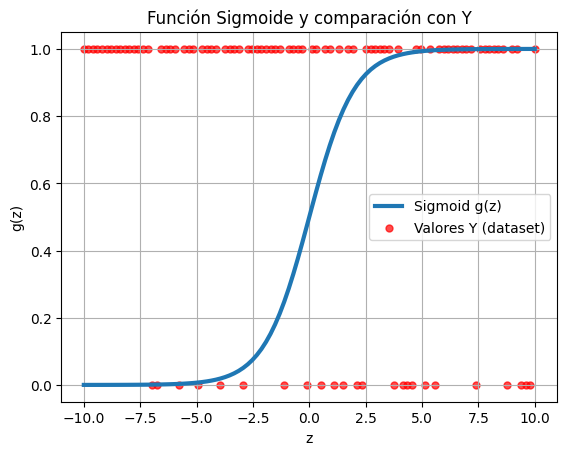

In [5]:
# TODO: Representa gráficamente el resultado de la función sigmoide
# Para el eje horizontal, usa una Z en el espacio lineal [-10, 10] de 100 elementos
# Representa los valores de g(z) como un gráfico de líneas y puntos
# Compara el resultado del sigmoide con Y, como un gráfico de puntos de color diferente
# Para la gráfica, incluye un título, leyenda, rejilla y ticks en el eje vertical relevantes

Z = np.linspace(-10, 10, 100)
g = sigmoid(Z)
plt.plot(Z, g, label='Sigmoid g(z)', linewidth=3)
plt.scatter(Z, Y, color='red', alpha=0.7, label='Valores Y (dataset)', s=25)
plt.title('Función Sigmoide y comparación con Y')
plt.xlabel('z')
plt.ylabel('g(z)')
plt.grid(True)
plt.legend()
plt.show()




## Implementar la función de coste

Vamos a implementar la función de coste sin regularizar. Esta función será similar a la que implementamos para regresión lineal en un ejercicio anterior.

Función de coste:

$$ Y = h_\Theta(x) = g(X \times \Theta^T) $$
$$ J(\Theta) = - [\frac{1}{m} \sum\limits_{i=0}^{m} (y^i log(h_\theta(x^i)) + (1 - y^i) log(1 - h_\theta(x^i))] $$

In [6]:
# TODO: Implementa la función de coste sin regularizar para regresión logística

def logistic_cost_function(X, Y, theta):
    """ Computa la función de coste para el dataset y coeficientes considerados

    Argumentos posicionales:
    x -- ndarray 2D con los valores de las variables independientes de los ejemplos, de tamaño m x n
    y -- ndarray 1D con la variable dependiente/objetivo, de tamaño m x 1 y valores 0 o 1
    theta -- ndarray 1D con los pesos de los coeficientes del modelo, de tamaño 1 x n (vector fila)

    Devuelve:
    j -- float con el coste para dicho array theta
    """
    m = X.shape[0]
    theta = theta.reshape(-1, 1)
    Y = Y.reshape(-1, 1)

    h = sigmoid(np.matmul(X, theta))  # predicciones

    J = -(1/m) * np.sum(Y * np.log(h) + (1 - Y) * np.log(1 - h))

    return float(J)



Del mismo modo que en ejercicios anteriores, comprueba tu implementación calculando la función de coste para cada ejemplo del dataset.

Comprueba que devuelve un escalar float, y no un ndarray. Usa `np.reshape()` si es necesario en tus multiplicaciones matriciales.

Con la *theta* correcta, la función de coste debe ser 0. Según se aleja la *theta* de la *Theta_verd*, el coste debe ser superior:

In [7]:
# TODO: Comprueba tu implementación sobre el dataset
Theta_verd = np.random.random(n + 1)

theta = Theta_verd

j = logistic_cost_function(X, Y, theta)

print('Coste del modelo:')
print(j)
print('Theta comprobado y Theta real:')
print(theta)
print(Theta_verd)

Coste del modelo:
0.5700427019767775
Theta comprobado y Theta real:
[0.60687652 0.023451   0.49115512]
[0.60687652 0.023451   0.49115512]
